In [1]:
import pandas as pd
import numpy as np
from numpy.fft import fft
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

def z_score(df: pd.DataFrame, col_name: str):
    _col = df[col_name]
    _mean = _col.mean()
    _std = _col.std()
    df[col_name] = (_col - _mean) / _std
    return df

In [2]:
data = pd.read_csv('../data/preprocessed/no_dup_13_series.csv')
data

,日期,柜员号,尾箱余额,在/离行,是否开启循环
0,2016-02-01,9012,600,在行,是
1,2016-02-02,9012,504000,在行,是
2,2016-02-03,9012,467300,在行,是
3,2016-02-04,9012,382200,在行,是
4,2016-02-05,9012,298700,在行,是
...,...,...,...,...,...
5195,2017-03-02,9490,163300,在行,是
5196,2017-03-03,9490,215500,在行,是
5197,2017-03-04,9490,241100,在行,是
5198,2017-03-05,9490,266400,在行,是


In [3]:
data[data['尾箱余额'] < 0]

,日期,柜员号,尾箱余额,在/离行,是否开启循环


In [4]:
X1 = {i: z_score(g, '尾箱余额')['尾箱余额'] for i, g in data.groupby('柜员号')}
list(X1.values())[1]

3600   -0.360440
3601   -0.360440
3602   -0.389723
3603   -0.626359
3604   -0.196615
          ...   
3995    1.233488
3996    0.881304
3997    0.775253
3998    0.647834
3999    0.332847
Name: 尾箱余额, Length: 400, dtype: float64

In [5]:
k_list = range(2, 13)
inertia_list = []
sil_list = []
for k in k_list:
    model = KMeans(n_clusters=k)
    _X = np.array(list(X1.values()))
    new_X = np.concatenate([_X.real, _X.imag], axis=-1)
    model.fit(new_X)
    inertia_list.append(model.inertia_)
    sil_list.append(silhouette_score(_X, model.labels_))
    

C:\Users\LiuShu\miniconda3\envs\main\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LiuShu\miniconda3\envs\main\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LiuShu\miniconda3\envs\main\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LiuShu\miniconda3\envs\main\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

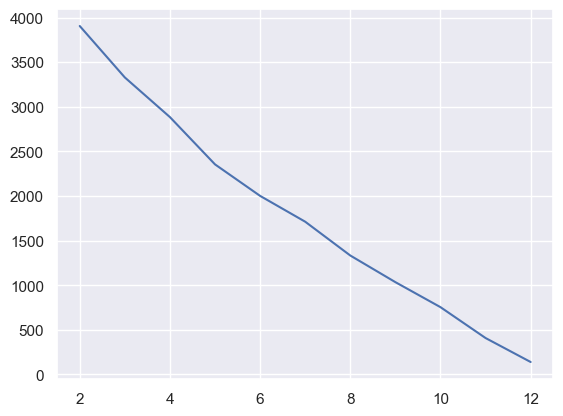

In [6]:
plt.plot(k_list, inertia_list)

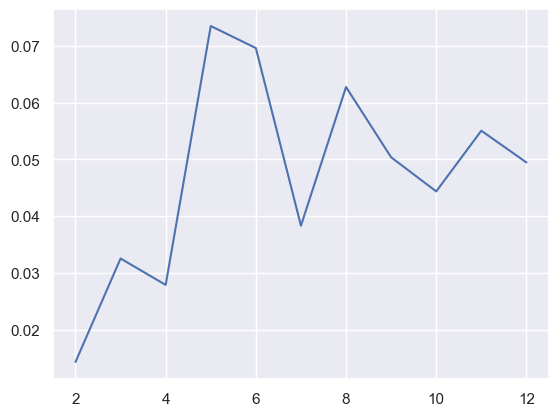

In [7]:
plt.plot(k_list, sil_list)

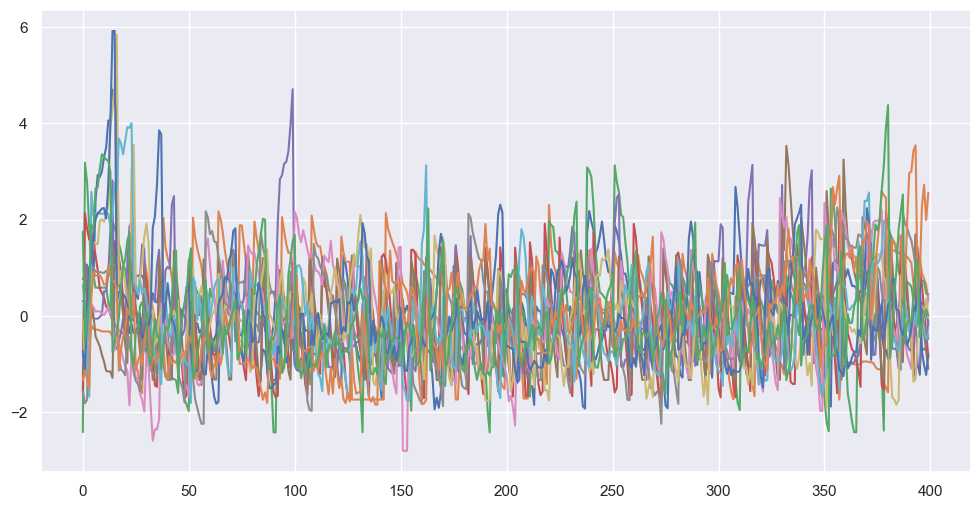

In [8]:
plt.figure(figsize=(12, 6))
for s in list(X1.values())[:]:
    pd.Series(s).reset_index(drop=True).plot()

<Axes: >

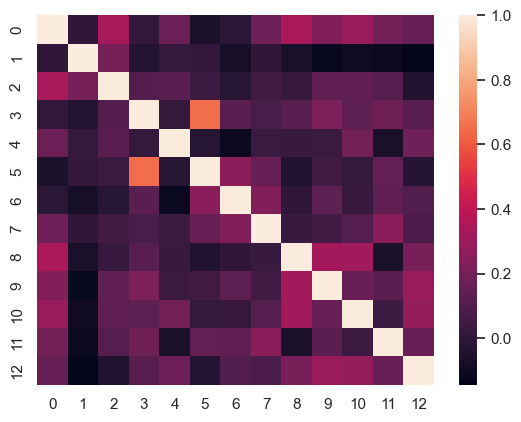

In [9]:
sns.heatmap(pd.DataFrame(np.array(list(X1.values())).T).corr())

In [10]:
sil_list2 = []
for k in k_list:
    model2 = AgglomerativeClustering(n_clusters=k)
    _X = np.array(list(X1.values()))
    new_X = np.concatenate([_X.real, _X.imag], axis=-1)
    model2.fit(new_X)
    sil_list2.append(silhouette_score(_X, model2.labels_))

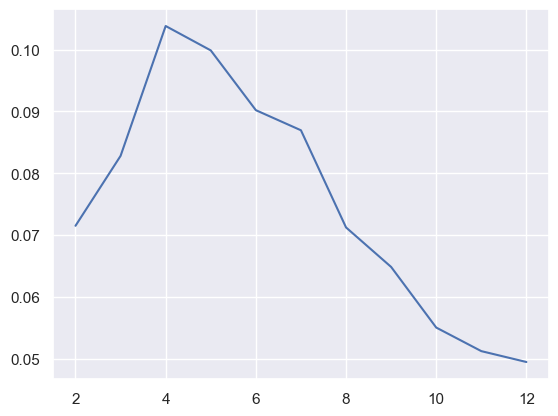

In [11]:
plt.plot(k_list, sil_list2)

In [12]:
model = KMeans(n_clusters=4)
model.fit(_X)

model2 = AgglomerativeClustering(n_clusters=4)
model2.fit(_X)

C:\Users\LiuShu\miniconda3\envs\main\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


AgglomerativeClustering(n_clusters=4)

In [13]:
pd.Series(model.labels_, index=X1.keys()).rename('kmeans cluster').sort_values()

9025    0
9049    0
9039    1
9200    1
9490    1
9003    2
9008    2
9012    2
9164    2
9207    2
9053    3
9077    3
9472    3
Name: kmeans cluster, dtype: int32

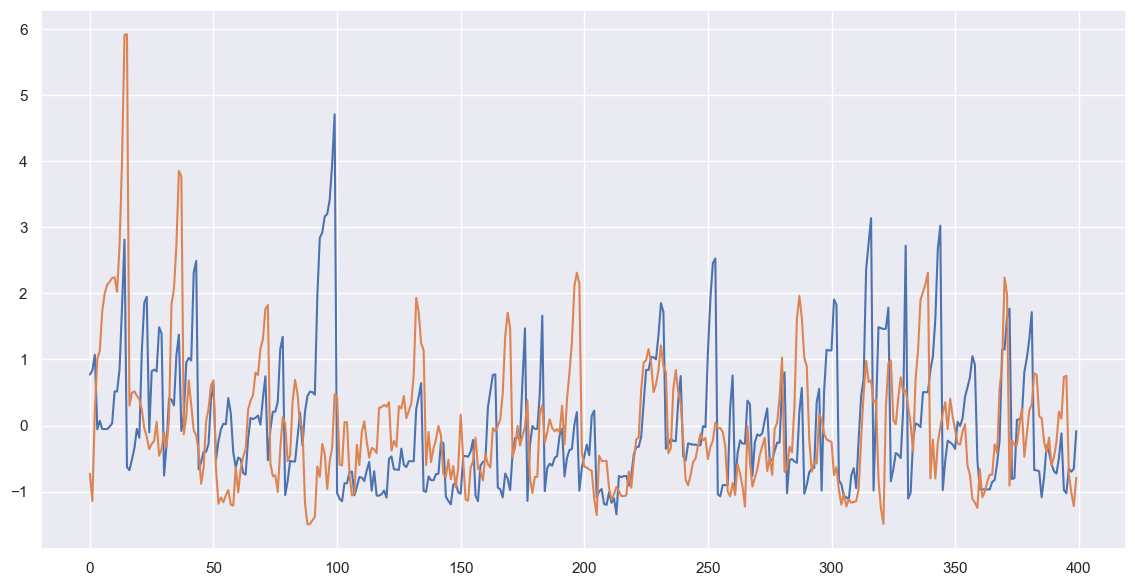

In [14]:
plt.figure(figsize=(14, 7))
for i in [9039, 9207]:
    pd.Series(X1[i]).reset_index(drop=True).plot()

In [15]:
pd.Series(model2.labels_, index=X1.keys()).rename('agg cluster').sort_values()

9003    0
9039    0
9164    0
9200    0
9207    0
9490    0
9053    1
9077    1
9472    1
9008    2
9012    2
9025    3
9049    3
Name: agg cluster, dtype: int64

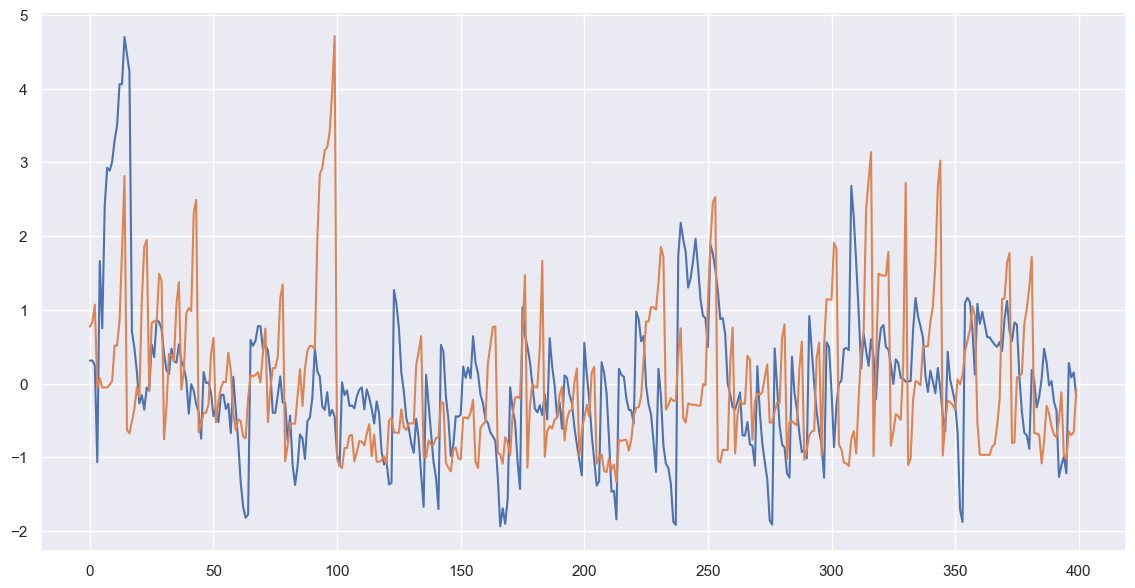

In [16]:
pd.Series(model.labels_, index=X1.keys()).rename('kmeans cluster').sort_values()
plt.figure(figsize=(14, 7))
for i in [9003, 9039,]:
	pd.Series(X1[i]).reset_index(drop=True).plot()

In [17]:
# assert False
_ = fft(X1[9077])
plt.figure(figsize=(12, 6))
pd.Series(_.real).plot()

AssertionError: 

In [ ]:
X1[9077].plot()

In [ ]:
X1[9012]

In [18]:
pd.concat([
    pd.Series(model.labels_, index=X1.keys()).rename('kmeans cluster').sort_values(),
    pd.Series(model2.labels_, index=X1.keys()).rename('agg cluster').sort_values(),
], axis=1)

,kmeans cluster,agg cluster
9025,0,3
9049,0,3
9039,1,0
9200,1,0
9490,1,0
9003,2,0
9008,2,2
9012,2,2
9164,2,0
9207,2,0


In [37]:
cluster = pd.Series(model2.labels_, index=X1.keys()).rename('agg cluster').sort_values()
cluster = cluster.reset_index().groupby('agg cluster')['index'].apply(list)
cluster.to_csv('../data/cluster/fft_agg_cluster_4.csv')
cluster

agg cluster
0    [9003, 9039, 9164, 9200, 9207, 9490]
1                      [9053, 9077, 9472]
2                            [9008, 9012]
3                            [9025, 9049]
Name: index, dtype: object